## 1. Word Cloud

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud based on date range
def generate_word_cloud(df):

    # Combine all cleaned text from the 'cleaned' column into a single string
    cleaned_text = " ".join(df['Tweet'].dropna().tolist())  # Use 'cleaned' column for word cloud

    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=None,  # Stopwords already removed in cleaning step
                          collocations=True).generate(cleaned_text)

    # Display the generated word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Tech Layoff", fontsize=20)
    plt.show()

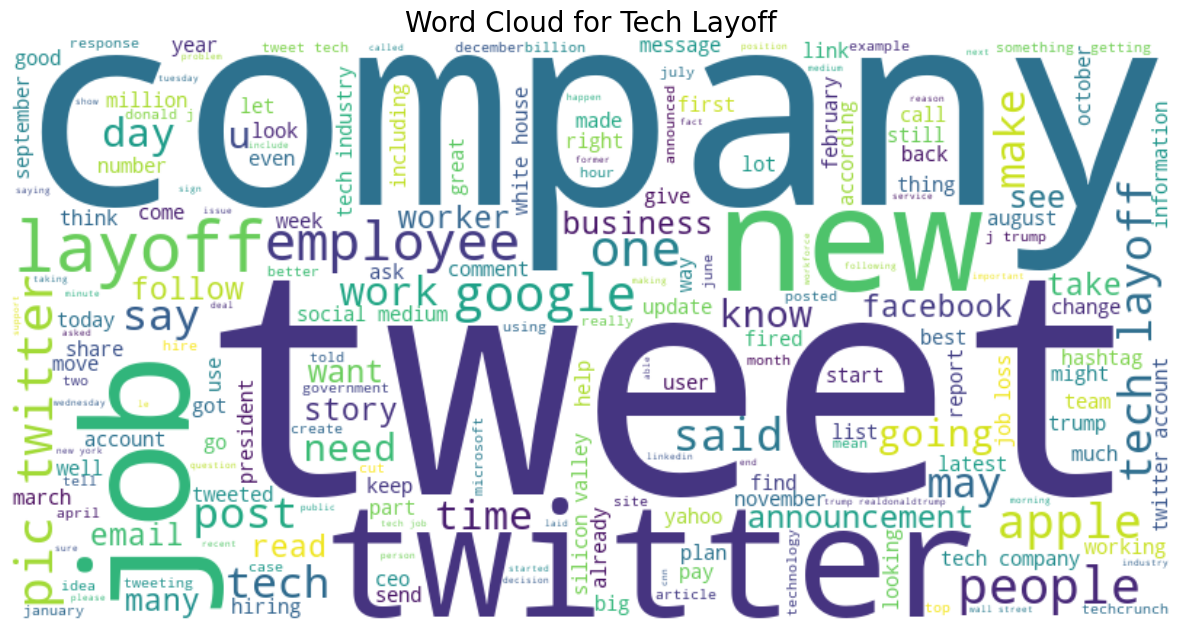

In [6]:
df = pd.read_csv("cleaned_tweets.csv")
generate_word_cloud(df)

**Observations**
- Useful words: Words like layoff, employee, company, google, fired, announcement, and tech are informative and domain-relevant.
- Noisy or redundant words:
    - Platform-specific terms: tweet, twitter, pic, email, post, retweet, account, user, follow – these may dominate but don’t add much semantic value regarding layoffs.
    - Generic words: said, know, new, one, day, time, need, got, make, going, look – these are common across many topics and may dilute the focus.
    - Months: march, april, july, etc. – consider filtering these unless you're doing temporal analysis.
    - Pronouns and filler words: If u, j, or partial names like donald j appear, these are usually side-effects of poor tokenization or not cleaning mentions/URLs/names well.

## 2. Sentiment Analysis

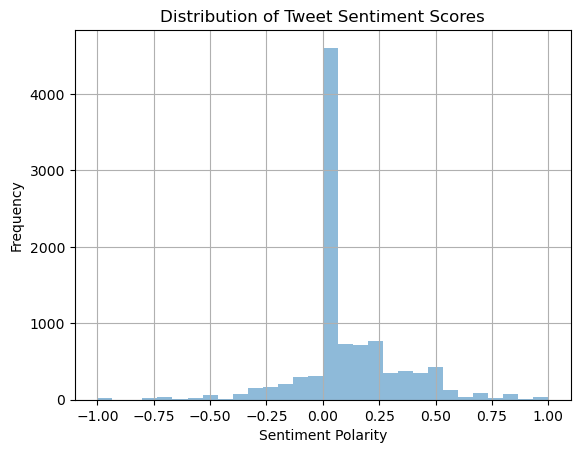

In [ ]:
%matplotlib inline
from textblob import TextBlob
import matplotlib.pyplot as plt

df_sentiment = df.copy()

# Apply sentiment analysis only to non-null, string-cast tweets
df_sentiment['Sentiment'] = df_sentiment['Tweet'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else 0.0
)

# Plot histogram of sentiment polarity scores
df_sentiment['Sentiment'].hist(bins=30, alpha=0.5)
plt.title("Distribution of Tweet Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Observations**

- Massive spike at 0: 
    - This suggests that a very large number of tweets have a sentiment polarity of exactly 0.0, which for TextBlob means neutral sentiment.
    - Possible reasons: 
        - Tweets that are short, factual, or lack emotional content.
        - Tweets that were empty or contained only links/emojis/usernames (TextBlob can’t extract sentiment from these).
        - Tweets that were "NaN" or low-quality and were assigned default 0.0 in the code fix.
- Right-skewed distribution:
    - There are more tweets with positive sentiment (right side of the histogram) than negative.
    - Positive tweets (e.g., > 0.1) seem to dominate the distribution, likely praising companies, sharing hopeful stories, or announcing news.
- Low frequency on the negative side:
    - Negative tweets (e.g., < -0.1) exist but are relatively fewer.
    - This might be surprising given the topic (“tech layoffs”), which you'd expect to evoke negative emotions.
    - Possible reason: people might post informative, neutral reports rather than personal emotional reactions.

## 3. Emotion Analysis

In [13]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tranminhanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

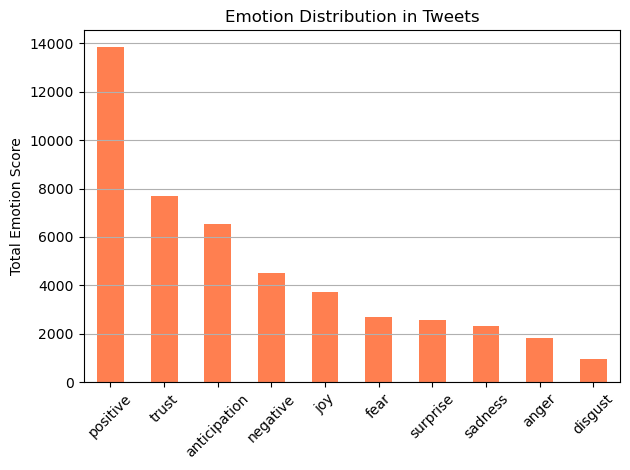

In [15]:
# Create a copy to work with
df_emotion = df.copy()

# Ensure text is a string
df_emotion['Tweet'] = df_emotion['Tweet'].astype(str)

# Extract emotions
def get_emotions(text):
    emo = NRCLex(text)
    return emo.top_emotions  # list of tuples [('emotion', score), ...]

# You can also use .raw_emotion_scores to get full dict

df_emotion['Emotions'] = df_emotion['Tweet'].apply(lambda x: NRCLex(x).raw_emotion_scores)

# Convert to a DataFrame of emotion counts
emotion_counts = pd.DataFrame(df_emotion['Emotions'].tolist()).fillna(0).sum().sort_values(ascending=False)

# Plotting emotion distribution
emotion_counts.plot(kind='bar', color='coral')
plt.title("Emotion Distribution in Tweets")
plt.ylabel("Total Emotion Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The emotion analysis shows that positive, trust, and anticipation are the most common emotions in tweets about tech layoffs. This suggests that despite the negative topic, people often frame their messages with optimism or future focus. Negative emotions like anger, sadness, and fear appear less frequently, indicating that many tweets are either neutral or solution-oriented rather than emotionally charged.